 Food  Food  Food  Food  Food  Food Non-Food Non-Food Non-Food Non-Food Non-Food  Food Non-Food Non-Food  Food Non-Food


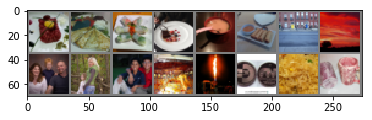

In [2]:
import torch
from torch import nn
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader, Sampler
from torchvision import datasets
from torchvision.transforms import transforms
from torch.optim import Adam

import matplotlib.pyplot as plt
import numpy as np
import PIL
from pathlib import Path

num_classes = 2
batch_size = 16
num_of_workers = 2

DATA_PATH_TRAIN = Path('/home/abhishek/Images/train')
DATA_PATH_TEST = Path('/home/abhishek/Images/test')

trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ])

train_dataset = datasets.ImageFolder(root=DATA_PATH_TRAIN, transform=trans)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_of_workers)

test_dataset = datasets.ImageFolder(root=DATA_PATH_TEST,transform=trans)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_of_workers)

classes=('Food','Non-Food')



# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' %   classes[labels[j]] for j in range(16)))
   


In [97]:
print(len(test_dataset))

1000


In [1]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)    # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)              #for flattening images
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [99]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [100]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10== 9:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,    10] loss: 0.003
[1,    20] loss: 0.003
[1,    30] loss: 0.003
[1,    40] loss: 0.003
[1,    50] loss: 0.004
[1,    60] loss: 0.003
[1,    70] loss: 0.003
[1,    80] loss: 0.003
[1,    90] loss: 0.003
[1,   100] loss: 0.003
[1,   110] loss: 0.003
[1,   120] loss: 0.003
[1,   130] loss: 0.003
[1,   140] loss: 0.003
[1,   150] loss: 0.003
[1,   160] loss: 0.003
[1,   170] loss: 0.003
[1,   180] loss: 0.003
[2,    10] loss: 0.003
[2,    20] loss: 0.003
[2,    30] loss: 0.003
[2,    40] loss: 0.003
[2,    50] loss: 0.003
[2,    60] loss: 0.003
[2,    70] loss: 0.003
[2,    80] loss: 0.003
[2,    90] loss: 0.003
[2,   100] loss: 0.003
[2,   110] loss: 0.003
[2,   120] loss: 0.003
[2,   130] loss: 0.003
[2,   140] loss: 0.003
[2,   150] loss: 0.003
[2,   160] loss: 0.003
[2,   170] loss: 0.003
[2,   180] loss: 0.003
[3,    10] loss: 0.003
[3,    20] loss: 0.003
[3,    30] loss: 0.003
[3,    40] loss: 0.003
[3,    50] loss: 0.003
[3,    60] loss: 0.003
[3,    70] loss: 0.003
[3,    80] 

[20,    80] loss: 0.002
[20,    90] loss: 0.002
[20,   100] loss: 0.002
[20,   110] loss: 0.002
[20,   120] loss: 0.002
[20,   130] loss: 0.001
[20,   140] loss: 0.002
[20,   150] loss: 0.001
[20,   160] loss: 0.002
[20,   170] loss: 0.002
[20,   180] loss: 0.002
[21,    10] loss: 0.002
[21,    20] loss: 0.002
[21,    30] loss: 0.001
[21,    40] loss: 0.002
[21,    50] loss: 0.001
[21,    60] loss: 0.002
[21,    70] loss: 0.001
[21,    80] loss: 0.001
[21,    90] loss: 0.002
[21,   100] loss: 0.002
[21,   110] loss: 0.001
[21,   120] loss: 0.002
[21,   130] loss: 0.002
[21,   140] loss: 0.002
[21,   150] loss: 0.002
[21,   160] loss: 0.002
[21,   170] loss: 0.002
[21,   180] loss: 0.001
[22,    10] loss: 0.001
[22,    20] loss: 0.001
[22,    30] loss: 0.002
[22,    40] loss: 0.002
[22,    50] loss: 0.002
[22,    60] loss: 0.002
[22,    70] loss: 0.001
[22,    80] loss: 0.002
[22,    90] loss: 0.001
[22,   100] loss: 0.002
[22,   110] loss: 0.002
[22,   120] loss: 0.002
[22,   130] loss

[39,    80] loss: 0.001
[39,    90] loss: 0.001
[39,   100] loss: 0.001
[39,   110] loss: 0.001
[39,   120] loss: 0.002
[39,   130] loss: 0.001
[39,   140] loss: 0.001
[39,   150] loss: 0.001
[39,   160] loss: 0.001
[39,   170] loss: 0.002
[39,   180] loss: 0.001
[40,    10] loss: 0.002
[40,    20] loss: 0.001
[40,    30] loss: 0.001
[40,    40] loss: 0.001
[40,    50] loss: 0.001
[40,    60] loss: 0.001
[40,    70] loss: 0.001
[40,    80] loss: 0.001
[40,    90] loss: 0.001
[40,   100] loss: 0.001
[40,   110] loss: 0.001
[40,   120] loss: 0.002
[40,   130] loss: 0.001
[40,   140] loss: 0.002
[40,   150] loss: 0.001
[40,   160] loss: 0.001
[40,   170] loss: 0.002
[40,   180] loss: 0.001
[41,    10] loss: 0.002
[41,    20] loss: 0.001
[41,    30] loss: 0.001
[41,    40] loss: 0.001
[41,    50] loss: 0.001
[41,    60] loss: 0.001
[41,    70] loss: 0.001
[41,    80] loss: 0.001
[41,    90] loss: 0.001
[41,   100] loss: 0.001
[41,   110] loss: 0.002
[41,   120] loss: 0.001
[41,   130] loss

[58,    80] loss: 0.001
[58,    90] loss: 0.001
[58,   100] loss: 0.001
[58,   110] loss: 0.001
[58,   120] loss: 0.001
[58,   130] loss: 0.001
[58,   140] loss: 0.001
[58,   150] loss: 0.001
[58,   160] loss: 0.001
[58,   170] loss: 0.001
[58,   180] loss: 0.001
[59,    10] loss: 0.001
[59,    20] loss: 0.001
[59,    30] loss: 0.001
[59,    40] loss: 0.001
[59,    50] loss: 0.001
[59,    60] loss: 0.001
[59,    70] loss: 0.001
[59,    80] loss: 0.001
[59,    90] loss: 0.002
[59,   100] loss: 0.002
[59,   110] loss: 0.001
[59,   120] loss: 0.001
[59,   130] loss: 0.001
[59,   140] loss: 0.001
[59,   150] loss: 0.001
[59,   160] loss: 0.001
[59,   170] loss: 0.001
[59,   180] loss: 0.001
[60,    10] loss: 0.001
[60,    20] loss: 0.001
[60,    30] loss: 0.001
[60,    40] loss: 0.001
[60,    50] loss: 0.001
[60,    60] loss: 0.001
[60,    70] loss: 0.001
[60,    80] loss: 0.001
[60,    90] loss: 0.001
[60,   100] loss: 0.001
[60,   110] loss: 0.001
[60,   120] loss: 0.001
[60,   130] loss

[77,    80] loss: 0.001
[77,    90] loss: 0.001
[77,   100] loss: 0.000
[77,   110] loss: 0.001
[77,   120] loss: 0.001
[77,   130] loss: 0.000
[77,   140] loss: 0.001
[77,   150] loss: 0.000
[77,   160] loss: 0.001
[77,   170] loss: 0.001
[77,   180] loss: 0.001
[78,    10] loss: 0.000
[78,    20] loss: 0.001
[78,    30] loss: 0.000
[78,    40] loss: 0.001
[78,    50] loss: 0.000
[78,    60] loss: 0.000
[78,    70] loss: 0.001
[78,    80] loss: 0.000
[78,    90] loss: 0.001
[78,   100] loss: 0.000
[78,   110] loss: 0.001
[78,   120] loss: 0.001
[78,   130] loss: 0.001
[78,   140] loss: 0.001
[78,   150] loss: 0.001
[78,   160] loss: 0.001
[78,   170] loss: 0.000
[78,   180] loss: 0.000
[79,    10] loss: 0.000
[79,    20] loss: 0.001
[79,    30] loss: 0.000
[79,    40] loss: 0.000
[79,    50] loss: 0.000
[79,    60] loss: 0.000
[79,    70] loss: 0.000
[79,    80] loss: 0.000
[79,    90] loss: 0.000
[79,   100] loss: 0.000
[79,   110] loss: 0.000
[79,   120] loss: 0.001
[79,   130] loss

[96,    80] loss: 0.000
[96,    90] loss: 0.000
[96,   100] loss: 0.000
[96,   110] loss: 0.000
[96,   120] loss: 0.000
[96,   130] loss: 0.001
[96,   140] loss: 0.000
[96,   150] loss: 0.000
[96,   160] loss: 0.000
[96,   170] loss: 0.000
[96,   180] loss: 0.000
[97,    10] loss: 0.000
[97,    20] loss: 0.000
[97,    30] loss: 0.000
[97,    40] loss: 0.000
[97,    50] loss: 0.000
[97,    60] loss: 0.000
[97,    70] loss: 0.000
[97,    80] loss: 0.000
[97,    90] loss: 0.001
[97,   100] loss: 0.000
[97,   110] loss: 0.000
[97,   120] loss: 0.000
[97,   130] loss: 0.000
[97,   140] loss: 0.000
[97,   150] loss: 0.000
[97,   160] loss: 0.000
[97,   170] loss: 0.000
[97,   180] loss: 0.000
[98,    10] loss: 0.000
[98,    20] loss: 0.000
[98,    30] loss: 0.000
[98,    40] loss: 0.000
[98,    50] loss: 0.000
[98,    60] loss: 0.000
[98,    70] loss: 0.000
[98,    80] loss: 0.000
[98,    90] loss: 0.000
[98,   100] loss: 0.000
[98,   110] loss: 0.000
[98,   120] loss: 0.000
[98,   130] loss

GroundTruth:  Food Food Food Food Food Food Food Food Food Food Food Food Food Food Food Food


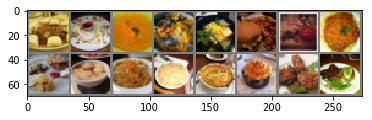

In [101]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(16)))

In [102]:

outputs = net(images) #lets see what our neural network thinks of


In [103]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(16)))

Predicted:   Food  Food  Food  Food  Food  Food  Food  Food  Food  Food  Food  Food  Food  Food  Food  Food


In [105]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 1000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 1000 test images: 85 %


In [93]:
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(3):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100* class_correct[i] / class_total[i]))

Accuracy of  Food : 100 %
Accuracy of Non-Food :  0 %
